In [390]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [391]:
# -------------------------------
# Step 1: Import required libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [392]:
import warnings
warnings.filterwarnings('ignore')
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
print("Imports done.")

Imports done.


In [393]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("sklearn",sklearn.__version__)
import flask
print("flask",flask.__version__)

numpy 2.0.2
pandas 2.2.2
sklearn 1.6.1
flask 3.1.2


In [394]:
data = pd.read_csv('/content/drive/MyDrive/ML learning/Mental Health Survey Dataset.csv')

In [395]:
print(data)

                Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  .

In [396]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [397]:
data = data.replace(' ?', np.nan)
data = data.replace('?', np.nan)


In [398]:
print(data.isna())

      Timestamp    Age  Gender  Country  state  self_employed  family_history  \
0         False  False   False    False  False           True           False   
1         False  False   False    False  False           True           False   
2         False  False   False    False   True           True           False   
3         False  False   False    False   True           True           False   
4         False  False   False    False  False           True           False   
...         ...    ...     ...      ...    ...            ...             ...   
1254      False  False   False    False   True          False           False   
1255      False  False   False    False  False          False           False   
1256      False  False   False    False  False          False           False   
1257      False  False   False    False  False          False           False   
1258      False  False   False    False  False          False           False   

      treatment  work_inter

In [399]:
print(data.isnull().sum())

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [400]:
print("Duplicate rows:",data.duplicated().sum())

Duplicate rows: 0


In [401]:
print(data.describe())

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


In [402]:
print(data.describe(include=[object]))


                  Timestamp Gender        Country state self_employed  \
count                  1259   1259           1259   744          1241   
unique                 1246     49             48    45             2   
top     2014-08-27 12:31:41   Male  United States    CA            No   
freq                      2    615            751   138          1095   

       family_history treatment work_interfere no_employees remote_work  ...  \
count            1259      1259            995         1259        1259  ...   
unique              2         2              4            6           2  ...   
top                No       Yes      Sometimes         6-25          No  ...   
freq              767       637            465          290         883  ...   

             leave mental_health_consequence phys_health_consequence  \
count         1259                      1259                    1259   
unique           5                         3                       3   
top     Don't kno

In [403]:
print("Unique values in each column:")
for col in data.columns:
    print(col, ":", data[col].nunique())

Unique values in each column:
Timestamp : 1246
Age : 53
Gender : 49
Country : 48
state : 45
self_employed : 2
family_history : 2
treatment : 2
work_interfere : 4
no_employees : 6
remote_work : 2
tech_company : 2
benefits : 3
care_options : 3
wellness_program : 3
seek_help : 3
anonymity : 3
leave : 5
mental_health_consequence : 3
phys_health_consequence : 3
coworkers : 3
supervisor : 3
mental_health_interview : 3
phys_health_interview : 3
mental_vs_physical : 3
obs_consequence : 2
comments : 160


In [404]:
for col in data.columns:
    print("Value counts for ")
    print(data[col].value_counts())
    print("--------------------------------------------------")


Value counts for 
Timestamp
2014-08-27 12:31:41    2
2014-08-28 16:52:34    2
2014-08-27 17:33:52    2
2014-08-27 12:54:11    2
2014-08-27 15:55:07    2
                      ..
2014-08-27 15:34:31    1
2014-08-27 15:34:23    1
2014-08-27 15:32:43    1
2014-08-27 15:32:19    1
2014-08-27 15:36:41    1
Name: count, Length: 1246, dtype: int64
--------------------------------------------------
Value counts for 
Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 50              6
 48              6
 20           

In [405]:
num_cols = data.select_dtypes(include="number").columns
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((data[col] < lower) | (data[col] > upper)).sum()
    print(col ,":", outliers ,"outliers")



Age : 40 outliers


In [406]:
drop_cols = []
for c in ['Timestamp', 'comments', 'state']:
    if c in data.columns:
        drop_cols.append(c)

In [407]:
print("Dropping:", drop_cols)
data = data.drop(columns=drop_cols, errors='ignore')
print("New shape:", data.shape)

Dropping: ['Timestamp', 'comments', 'state']
New shape: (1259, 24)


In [408]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data.loc[(data['Age'] < 16) | (data['Age'] > 100), 'Age'] = np.nan


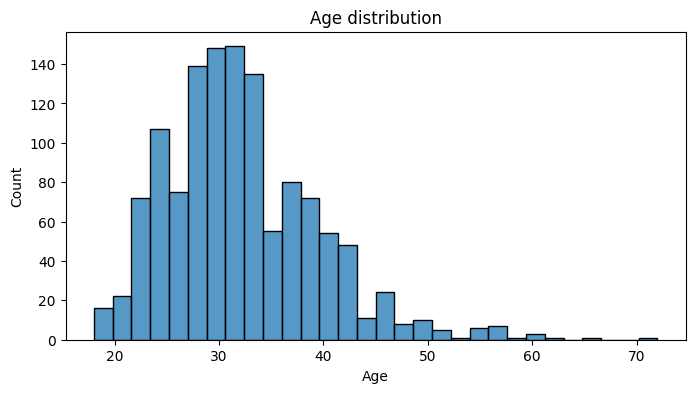

In [409]:
plt.figure(figsize=(8,4))
sns.histplot(data['Age'].dropna(), bins=30)
plt.title("Age distribution")
plt.show()

In [410]:
num_cols = data.select_dtypes(include="number").columns
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((data[col] < lower) | (data[col] > upper)).sum()
    print(col ,":", outliers ,"outliers")


Age : 32 outliers


In [411]:
data['Gender'] = data['Gender'].astype(str).str.lower().str.strip()





In [412]:
data['Gender'] = data['Gender'].apply(
    lambda x: 'female' if x in ['female','f','woman','cis female','female (cis)','female (trans)','femake','femail','female ']
    else 'male' if x in ['male','m','man','cis male','male (cis)','mail','mal','male ']
    else 'other'
)

In [413]:
print("Gender value counts:")
print(data['Gender'].value_counts())


Gender value counts:
Gender
male      982
female    248
other      29
Name: count, dtype: int64


In [414]:
data['work_interfere'] = data['work_interfere'].fillna(data['work_interfere'].mode()[0])
data['self_employed'] = data['self_employed'].fillna(data['self_employed'].mode()[0])

In [415]:
 data['Age'] = data['Age'].fillna(int(data['Age'].median()))

In [416]:
print(data.isnull().sum())


Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


Visualisation


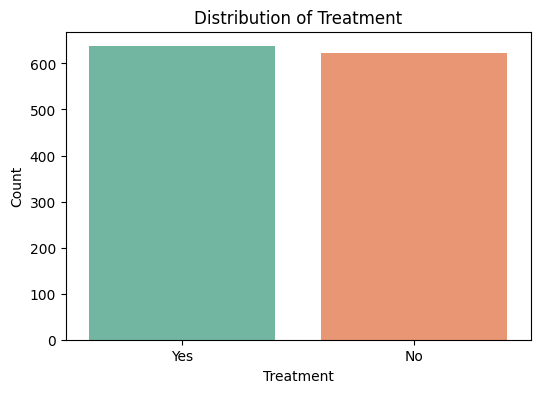

In [417]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='treatment', data=data, palette='Set2')
plt.title('Distribution of Treatment')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.show()


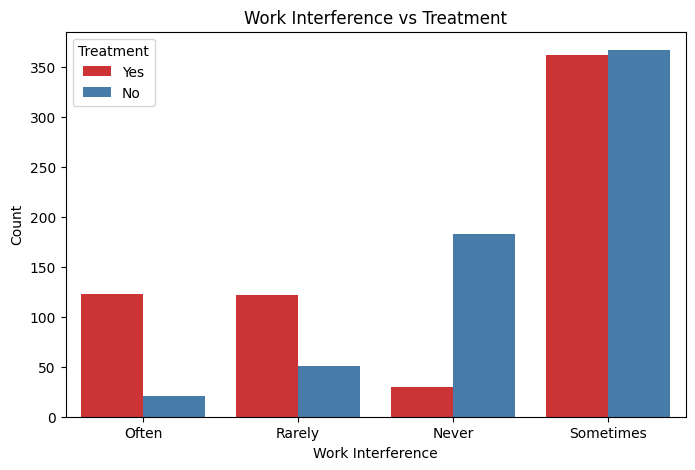

In [418]:
plt.figure(figsize=(8,5))
sns.countplot(x='work_interfere', hue='treatment', data=data, palette='Set1')
plt.title('Work Interference vs Treatment')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()


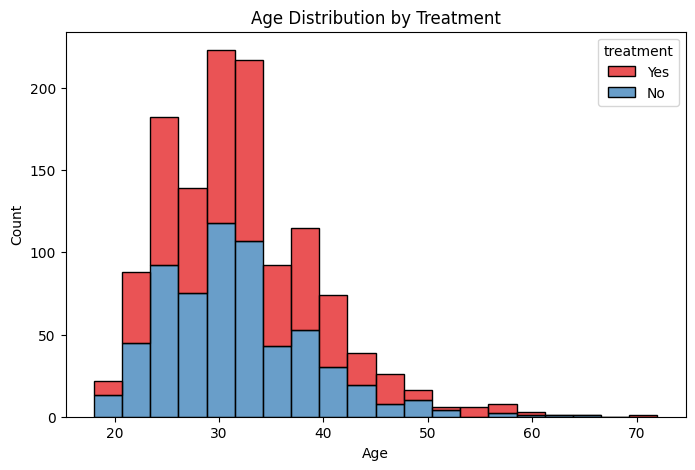

In [419]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='Age', hue='treatment', multiple='stack', bins=20, palette='Set1')
plt.title('Age Distribution by Treatment')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


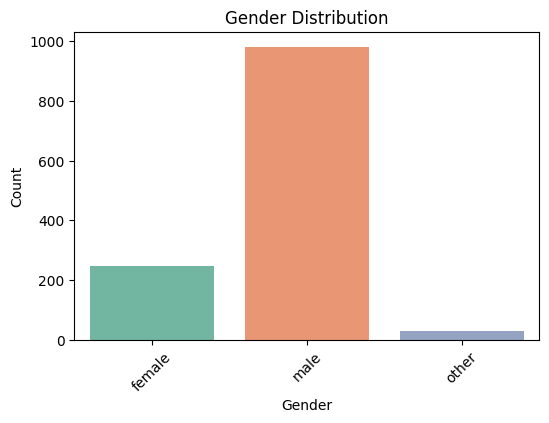

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=data, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Encoding


In [421]:

if 'work_interfere' in data.columns:
    data['work_interfere'] = data['work_interfere'].map({
        'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3
    }).fillna(0).astype(int)

if 'leave' in data.columns:
    data['leave'] = data['leave'].map({
        "Don't know": 0, 'Very difficult': 1, 'Somewhat difficult': 2,'Somewhat easy': 3, 'Very easy': 4
    }).fillna(0).astype(int)

if 'country' in data.columns:
    data['country'] = data['country'].apply(
        lambda x: x if data['country'].value_counts()[x] >= 20 else 'Other'
    )

print("Simple ordinal & country encoding done")


Simple ordinal & country encoding done


In [422]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer




In [423]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)


Categorical columns: ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


In [424]:
le = LabelEncoder()


In [425]:
data_encoded = data.copy()


In [426]:
for col in cat_cols:
    if data[col].nunique() <= 2:
        data_encoded[col] = le.fit_transform(data[col].astype(str))
    else:
        temp = pd.get_dummies(data[col], prefix=col)
        data_encoded = pd.concat([data_encoded, temp], axis=1)
        data_encoded.drop(col, axis=1, inplace=True)

In [427]:
print("Encoding done successfully")


Encoding done successfully


In [428]:
joblib.dump(le, 'label_encoder.pkl')
print("Label Encoder saved successfully.")


Label Encoder saved successfully.


In [429]:
data_encoded.head()

,Age,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,leave,obs_consequence,Gender_female,...,supervisor_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes
0,37.0,0,0,1,3,0,1,3,0,True,...,True,False,True,False,True,False,False,False,False,True
1,44.0,0,0,0,1,0,0,0,0,False,...,False,False,True,False,False,True,False,True,False,False
2,32.0,0,0,0,1,0,1,2,0,False,...,True,False,False,True,False,False,True,False,True,False
3,31.0,0,1,1,3,0,1,2,1,False,...,False,True,False,False,True,False,False,False,True,False
4,31.0,0,0,0,0,1,1,0,0,False,...,True,False,False,True,False,False,True,True,False,False


In [430]:
print(data_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Columns: 102 entries, Age to mental_vs_physical_Yes
dtypes: bool(93), float64(1), int64(8)
memory usage: 203.0 KB
None


Correlations and Heatmap


In [431]:
corr_matrix = data_encoded.corr()
print(corr_matrix)


                                    Age  self_employed  family_history  \
Age                            1.000000       0.071318        0.009103   
self_employed                  0.071318       1.000000        0.009890   
family_history                 0.009103       0.009890        1.000000   
treatment                      0.073165       0.020493        0.377918   
work_interfere                -0.053160       0.049334        0.183712   
...                                 ...            ...             ...   
phys_health_interview_No       0.047396      -0.045540        0.058576   
phys_health_interview_Yes     -0.053970       0.010646        0.000271   
mental_vs_physical_Don't know -0.000496      -0.093593       -0.075458   
mental_vs_physical_No          0.023951      -0.052678        0.092148   
mental_vs_physical_Yes        -0.023330       0.157263       -0.007458   

                               treatment  work_interfere  remote_work  \
Age                             0.0731

In [432]:
corr_data = data_encoded.select_dtypes(include=['int64', 'float64'])
corr_matrix = corr_data.corr()
print(corr_matrix)

                      Age  self_employed  family_history  treatment  \
Age              1.000000       0.071318        0.009103   0.073165   
self_employed    0.071318       1.000000        0.009890   0.020493   
family_history   0.009103       0.009890        1.000000   0.377918   
treatment        0.073165       0.020493        0.377918   1.000000   
work_interfere  -0.053160       0.049334        0.183712   0.304502   
remote_work      0.145461       0.316533        0.014456   0.026937   
tech_company    -0.057668       0.080136       -0.046079  -0.031525   
leave           -0.028854       0.145130        0.025891   0.038099   
obs_consequence  0.070011       0.081899        0.124861   0.156972   

                 work_interfere  remote_work  tech_company     leave  \
Age                   -0.053160     0.145461     -0.057668 -0.028854   
self_employed          0.049334     0.316533      0.080136  0.145130   
family_history         0.183712     0.014456     -0.046079  0.025891   
t

In [433]:
target_corr = corr_matrix['treatment'].sort_values(ascending=False)
print("Correlation of each feature with treatment:\n")
print(target_corr)

Correlation of each feature with treatment:

treatment          1.000000
family_history     0.377918
work_interfere     0.304502
obs_consequence    0.156972
Age                0.073165
leave              0.038099
remote_work        0.026937
self_employed      0.020493
tech_company      -0.031525
Name: treatment, dtype: float64


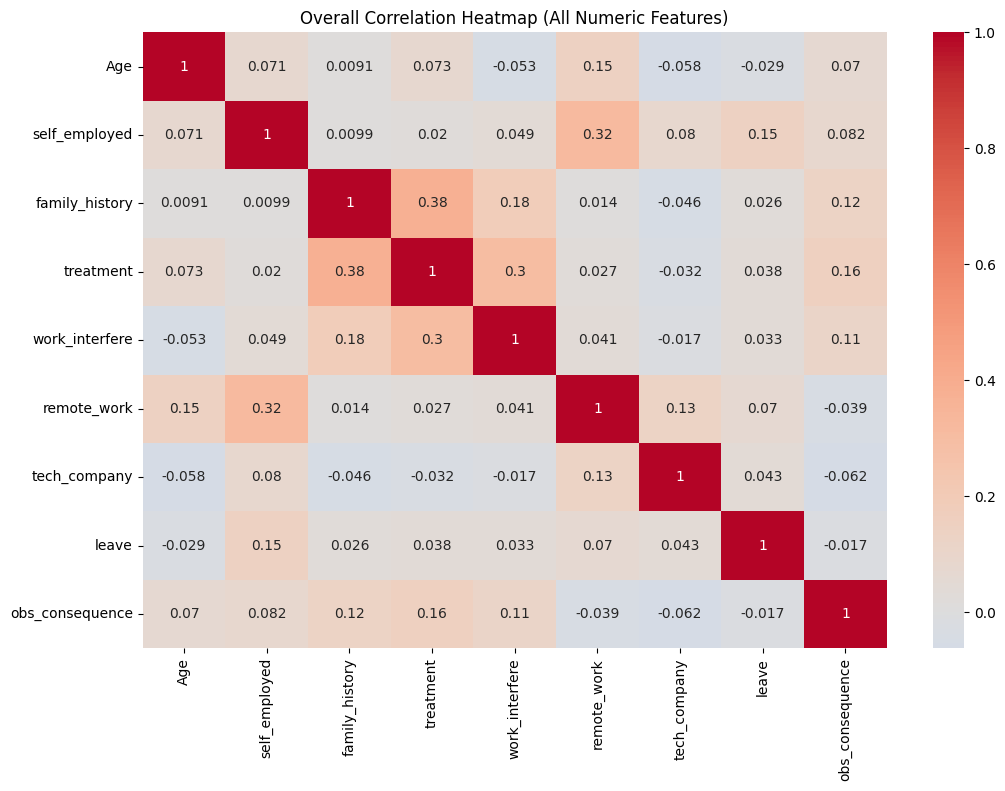

In [434]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', center=0)
plt.title("Overall Correlation Heatmap (All Numeric Features)")
plt.show()

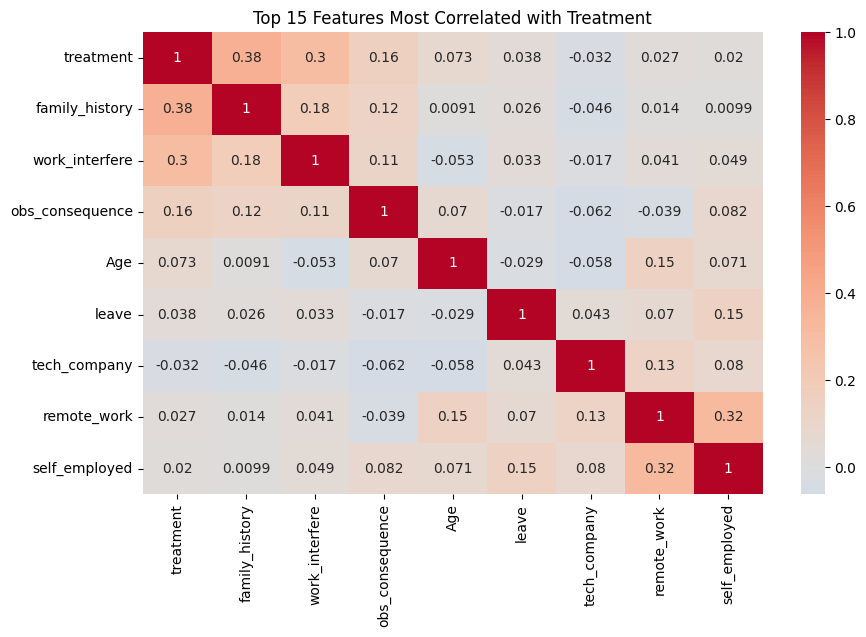

In [435]:
top_features = target_corr.abs().sort_values(ascending=False).head(15).index
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix.loc[top_features, top_features], annot=True, cmap='coolwarm', center=0)
plt.title("Top 15 Features Most Correlated with Treatment")
plt.show()

In [436]:
target_corr = corr_matrix['treatment'].sort_values(ascending=False)
abs_corr = target_corr.abs().sort_values(ascending=False)
print("Top 15 features most strongly correlated (positive or negative) with treatment:\n")
print(abs_corr.head(15))



Top 15 features most strongly correlated (positive or negative) with treatment:

treatment          1.000000
family_history     0.377918
work_interfere     0.304502
obs_consequence    0.156972
Age                0.073165
leave              0.038099
tech_company       0.031525
remote_work        0.026937
self_employed      0.020493
Name: treatment, dtype: float64


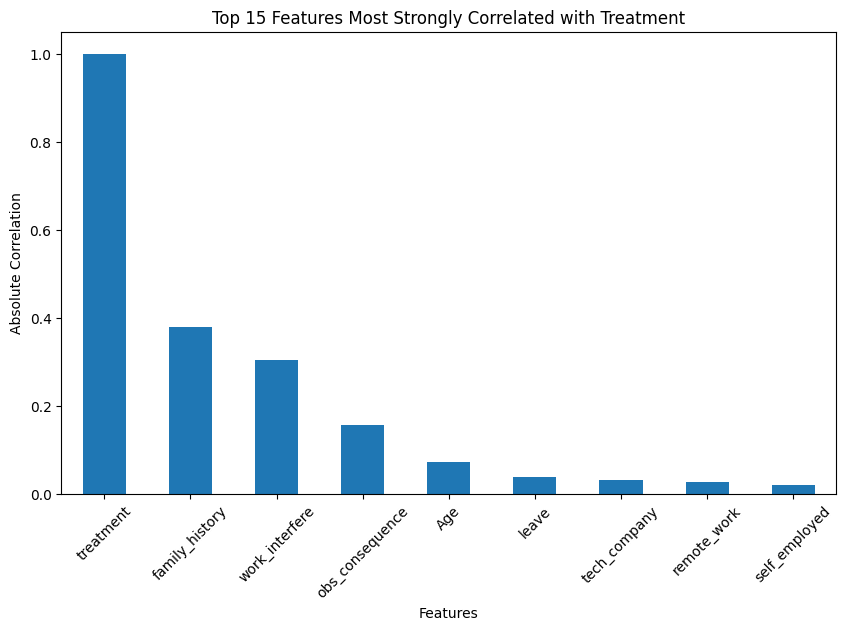

In [437]:
plt.figure(figsize=(10, 6))
abs_corr.head(15).plot(kind='bar')
plt.title('Top 15 Features Most Strongly Correlated with Treatment')
plt.ylabel('Absolute Correlation')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()


Model Training


In [438]:

X = data_encoded.drop('treatment', axis=1)
y = data_encoded['treatment']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1259, 101)
Shape of y: (1259,)


In [439]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (1007, 101)
Testing features shape: (252, 101)
Training target shape: (1007,)
Testing target shape: (252,)


In [440]:
joblib.dump(X.columns.tolist(), 'columns.pkl')
print("Column names saved successfully.")


Column names saved successfully.


In [441]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled successfully")


Data scaled successfully


In [442]:
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved successfully.")


Scaler saved successfully.


In [443]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [444]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6984126984126984

Confusion Matrix:
 [[89 40]
 [36 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70       129
           1       0.69      0.71      0.70       123

    accuracy                           0.70       252
   macro avg       0.70      0.70      0.70       252
weighted avg       0.70      0.70      0.70       252



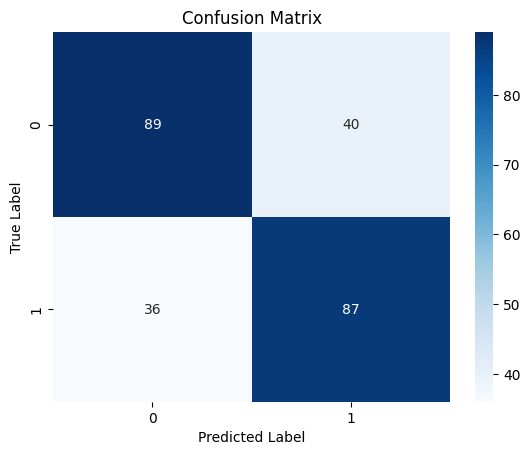

In [445]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


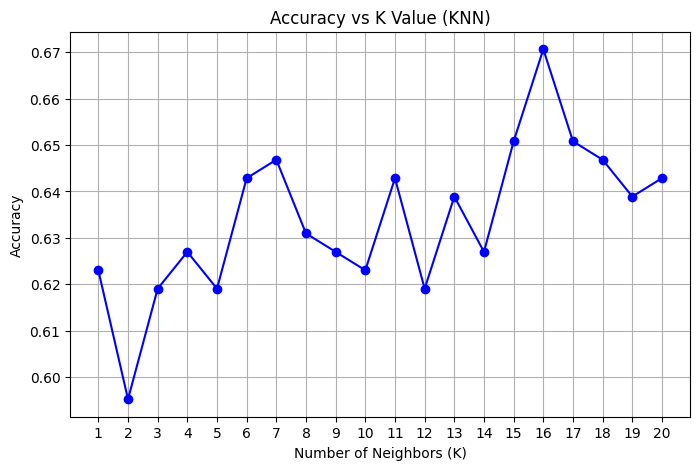

In [446]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracy_scores = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    accuracy_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(1, 21), accuracy_scores, marker='o', color='blue')
plt.title("Accuracy vs K Value (KNN)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(range(1, 21))
plt.show()




In [447]:
best_k = accuracy_scores.index(max(accuracy_scores)) + 1
print("Best K value:", best_k)
print("Highest Accuracy:", max(accuracy_scores))

Best K value: 16
Highest Accuracy: 0.6706349206349206


In [448]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Classifier Evaluation:
Accuracy: 0.6706349206349206

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.80      0.71       129
           1       0.72      0.54      0.61       123

    accuracy                           0.67       252
   macro avg       0.68      0.67      0.66       252
weighted avg       0.68      0.67      0.66       252


Confusion Matrix:
 [[103  26]
 [ 57  66]]


Decision Tree

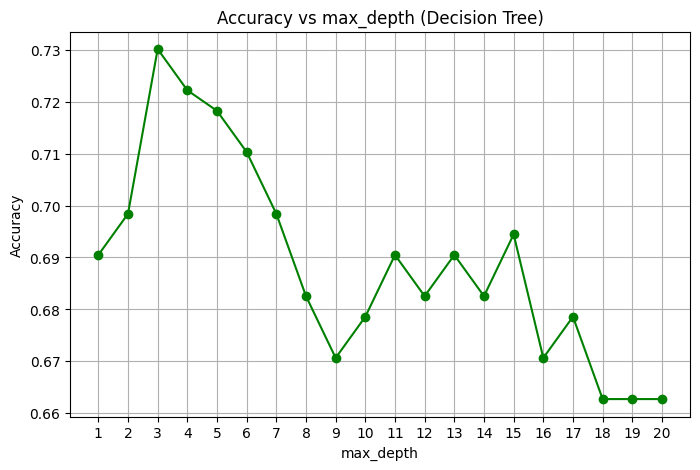

Best max_depth: 3
Highest Accuracy: 0.7301587301587301


In [449]:
from sklearn.tree import DecisionTreeClassifier

accuracy_scores = []

for depth in range(1, 21):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

plt.figure(figsize=(8,5))
plt.plot(range(1, 21), accuracy_scores, marker='o', linestyle='-', color='green')
plt.title("Accuracy vs max_depth (Decision Tree)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(range(1, 21))
plt.show()

best_depth = accuracy_scores.index(max(accuracy_scores)) + 1
print("Best max_depth:", best_depth)
print("Highest Accuracy:", max(accuracy_scores))



In [450]:
final_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_tree.fit(X_train, y_train)
y_pred_tree = final_tree.predict(X_test)

print("Final Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Final Decision Tree Results:
Accuracy: 0.7301587301587301
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       129
           1       0.72      0.73      0.73       123

    accuracy                           0.73       252
   macro avg       0.73      0.73      0.73       252
weighted avg       0.73      0.73      0.73       252

Confusion Matrix:
 [[94 35]
 [33 90]]


Random Forest

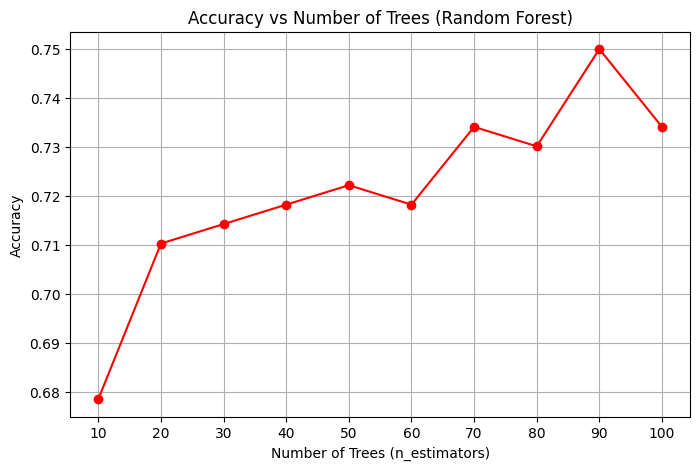

Best n_estimators: 90
Highest Accuracy: 0.75


In [451]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

accuracy_scores = []

for n in range(10, 110, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

plt.figure(figsize=(8,5))
plt.plot(range(10, 110, 10), accuracy_scores, marker='o', linestyle='-', color='red')
plt.title("Accuracy vs Number of Trees (Random Forest)")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(range(10, 110, 10))
plt.show()

best_n = range(10, 110, 10)[accuracy_scores.index(max(accuracy_scores))]
print("Best n_estimators:", best_n)
print("Highest Accuracy:", max(accuracy_scores))



In [452]:
final_rf = RandomForestClassifier(n_estimators=best_n, random_state=42)
final_rf.fit(X_train, y_train)
y_pred_rf = final_rf.predict(X_test)

print("Final Random Forest Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Final Random Forest Model Results:
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75       129
           1       0.73      0.76      0.75       123

    accuracy                           0.75       252
   macro avg       0.75      0.75      0.75       252
weighted avg       0.75      0.75      0.75       252

Confusion Matrix:
 [[95 34]
 [29 94]]


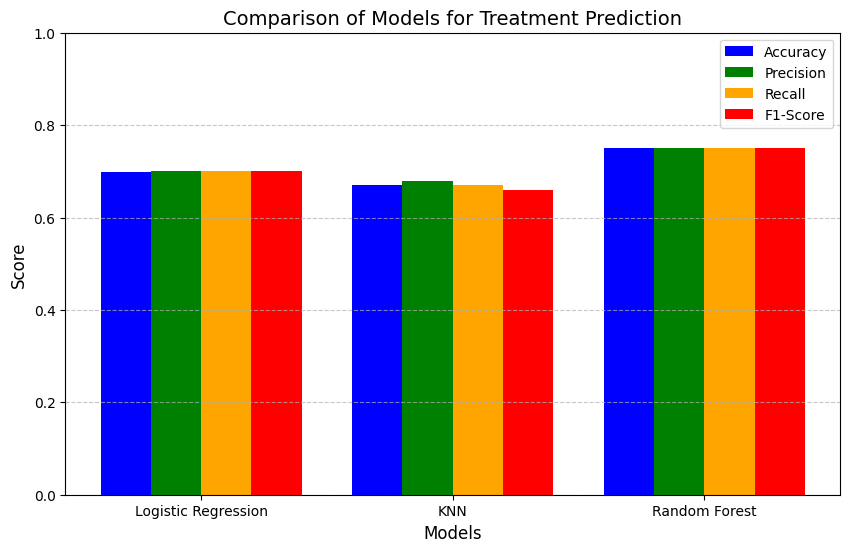

In [453]:
import numpy as np
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN', 'Random Forest']
accuracy = [0.698, 0.671, 0.75]
precision = [0.70, 0.68, 0.75]
recall = [0.70, 0.67, 0.75]
f1 = [0.70, 0.66, 0.75]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10,6))
plt.bar(x - width*1.5, accuracy, width, label='Accuracy', color='blue')
plt.bar(x - width/2, precision, width, label='Precision', color='green')
plt.bar(x + width/2, recall, width, label='Recall', color='orange')
plt.bar(x + width*1.5, f1, width, label='F1-Score', color='red')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Comparison of Models for Treatment Prediction', fontsize=14)
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [454]:
import pandas as pd

model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest'],
    'Accuracy': [0.698, 0.671, 0.75],
    'Precision': [0.70, 0.68, 0.75],
    'Recall': [0.70, 0.67, 0.75],
    'F1-Score': [0.70, 0.66, 0.75]
})

best_model = model_comparison.loc[model_comparison['Accuracy'].idxmax(), 'Model']
print(" Best Model for this dataset:", best_model)

model_comparison


 Best Model for this dataset: Random Forest


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.698,0.70,0.70,0.70
1,K-Nearest Neighbors,0.671,0.68,0.67,0.66
2,Random Forest,0.750,0.75,0.75,0.75


In [455]:
joblib.dump(final_rf, 'mental_health_model.pkl')
print("Final Random Forest model saved successfully.")

Final Random Forest model saved successfully.


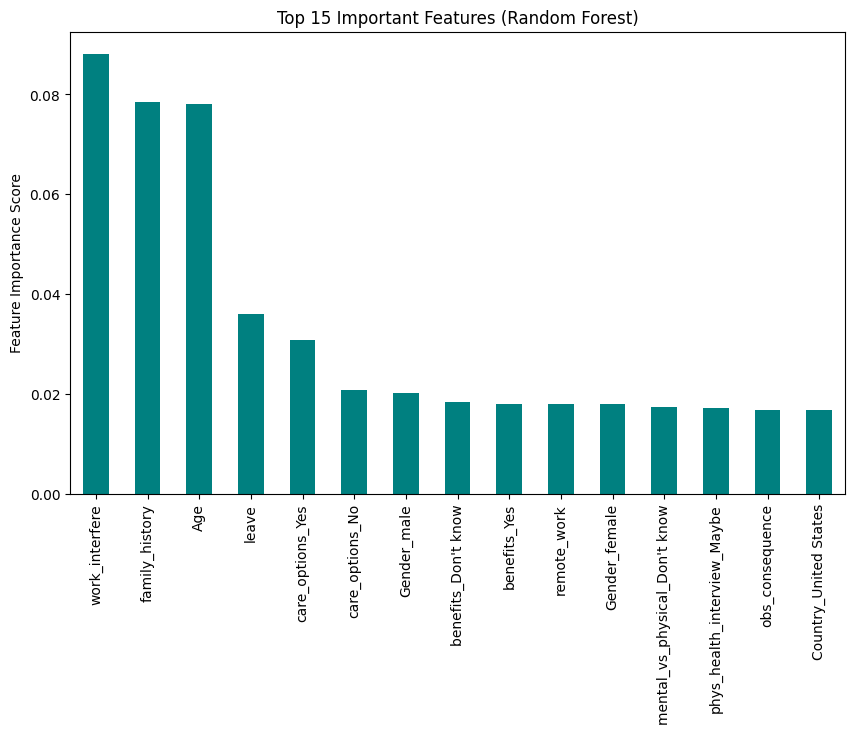

In [456]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(final_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feature_importances.head(15).plot(kind='bar', color='teal')
plt.title("Top 15 Important Features (Random Forest)")
plt.ylabel("Feature Importance Score")
plt.show()


In [457]:
print("Original numerical columns:", num_cols.tolist())
print("Original categorical columns:", cat_cols)

Original numerical columns: ['Age']
Original categorical columns: ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


In [458]:
print("Dropped columns:", drop_cols)

Dropped columns: ['Timestamp', 'comments', 'state']


In [459]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_rf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores)
print("Mean CV Accuracy:", scores.mean())



Cross-Validation Accuracy: [0.71428571 0.71825397 0.71428571 0.73412698 0.67729084]
Mean CV Accuracy: 0.7116486435211534


In [460]:
y_proba = final_rf.predict_proba(X_test_scaled)[:, 1]
test_results['Probability'] = y_proba

print(test_results.head(10))


   Actual  Predicted  Probability
0       0          1     0.288889
1       0          0     0.400000
2       0          0     0.366667
3       0          0     0.322222
4       1          1     0.488889
5       0          0     0.388889
6       1          1     0.411111
7       1          1     0.533333
8       1          1     0.422222
9       1          0     0.288889


In [461]:
model = final_rf
sample = X_test.sample(1, random_state=42)
sample_scaled = scaler.transform(sample)





In [462]:
pred = model.predict(sample_scaled)[0]
prob = model.predict_proba(sample_scaled)[0][1]
score = round(prob * 100, 2)


In [463]:
print("Sample Data Index:", sample.index[0])
print("Predicted Class:", pred)
print("Probability of Needing Treatment:", prob)
print("Mental Health Treatment Likelihood Score:", score, "/ 100")

Sample Data Index: 596
Predicted Class: 0
Probability of Needing Treatment: 0.4888888888888889
Mental Health Treatment Likelihood Score: 48.89 / 100


In [464]:
if score < 40:
    message = "No, treatment may not be needed (Low Risk)"
elif 40 <= score <= 70:
    message = "You might want to consult a professional (Moderate Risk)"
else:
    message = "Yes, treatment is likely recommended (High Risk)"

print("Prediction Message:", message)

Prediction Message: You might want to consult a professional (Moderate Risk)


In [465]:
import joblib
joblib.dump(final_rf, "treatment_prediction_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [466]:
# Test loading of saved files
loaded_model = joblib.load('mental_health_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')
loaded_columns = joblib.load('columns.pkl')
loaded_encoder = joblib.load('label_encoder.pkl')

print("All saved files loaded successfully!")

# Optional quick test prediction (using a few test samples)
sample = X_test.iloc[:5]
sample_scaled = loaded_scaler.transform(sample)
print("Predicted:", loaded_model.predict(sample_scaled))

All saved files loaded successfully!
Predicted: [0 0 0 0 0]


In [467]:
import pickle
from google.colab import files
